In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path=os.path.join(dirname,filename)
        data=pd.read_csv(path)

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
data=data.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [9]:
d1=data.loc[:,['Customer_Age', 'Gender',
        'Credit_Limit', 'Total_Trans_Amt',"Dependent_count",'Attrition_Flag','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
d1

,Customer_Age,Gender,Credit_Limit,Total_Trans_Amt,Dependent_count,Attrition_Flag,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,12691.0,1144,3,Existing Customer,39,5,1,3,777,11914.0,1.335,42,1.625,0.061
1,49,F,8256.0,1291,5,Existing Customer,44,6,1,2,864,7392.0,1.541,33,3.714,0.105
2,51,M,3418.0,1887,3,Existing Customer,36,4,1,0,0,3418.0,2.594,20,2.333,0.000
3,40,F,3313.0,1171,4,Existing Customer,34,3,4,1,2517,796.0,1.405,20,2.333,0.760
4,40,M,4716.0,816,3,Existing Customer,21,5,1,0,0,4716.0,2.175,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,4003.0,15476,2,Existing Customer,40,3,2,3,1851,2152.0,0.703,117,0.857,0.462
10123,41,M,4277.0,8764,2,Attrited Customer,25,4,2,3,2186,2091.0,0.804,69,0.683,0.511
10124,44,F,5409.0,10291,1,Attrited Customer,36,5,3,4,0,5409.0,0.819,60,0.818,0.000
10125,30,M,5281.0,8395,2,Attrited Customer,36,4,3,3,0,5281.0,0.535,62,0.722,0.000


In [10]:
d2=pd.get_dummies(d1,columns=["Attrition_Flag","Gender"],dtype=int)
d2

,Customer_Age,Credit_Limit,Total_Trans_Amt,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Gender_F,Gender_M
0,45,12691.0,1144,3,39,5,1,3,777,11914.0,1.335,42,1.625,0.061,0,1,0,1
1,49,8256.0,1291,5,44,6,1,2,864,7392.0,1.541,33,3.714,0.105,0,1,1,0
2,51,3418.0,1887,3,36,4,1,0,0,3418.0,2.594,20,2.333,0.000,0,1,0,1
3,40,3313.0,1171,4,34,3,4,1,2517,796.0,1.405,20,2.333,0.760,0,1,1,0
4,40,4716.0,816,3,21,5,1,0,0,4716.0,2.175,28,2.500,0.000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,4003.0,15476,2,40,3,2,3,1851,2152.0,0.703,117,0.857,0.462,0,1,0,1
10123,41,4277.0,8764,2,25,4,2,3,2186,2091.0,0.804,69,0.683,0.511,1,0,0,1
10124,44,5409.0,10291,1,36,5,3,4,0,5409.0,0.819,60,0.818,0.000,1,0,1,0
10125,30,5281.0,8395,2,36,4,3,3,0,5281.0,0.535,62,0.722,0.000,1,0,0,1


In [11]:
d2=d2.drop(columns=["Attrition_Flag_Attrited Customer","Gender_M"])
d2

,Customer_Age,Credit_Limit,Total_Trans_Amt,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_F
0,45,12691.0,1144,3,39,5,1,3,777,11914.0,1.335,42,1.625,0.061,1,0
1,49,8256.0,1291,5,44,6,1,2,864,7392.0,1.541,33,3.714,0.105,1,1
2,51,3418.0,1887,3,36,4,1,0,0,3418.0,2.594,20,2.333,0.000,1,0
3,40,3313.0,1171,4,34,3,4,1,2517,796.0,1.405,20,2.333,0.760,1,1
4,40,4716.0,816,3,21,5,1,0,0,4716.0,2.175,28,2.500,0.000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,4003.0,15476,2,40,3,2,3,1851,2152.0,0.703,117,0.857,0.462,1,0
10123,41,4277.0,8764,2,25,4,2,3,2186,2091.0,0.804,69,0.683,0.511,0,0
10124,44,5409.0,10291,1,36,5,3,4,0,5409.0,0.819,60,0.818,0.000,0,1
10125,30,5281.0,8395,2,36,4,3,3,0,5281.0,0.535,62,0.722,0.000,0,0


In [12]:
col=d2.columns
col

Index(['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Attrition_Flag_Existing Customer',
       'Gender_F'],
      dtype='object')

In [13]:
d2=d2[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Dependent_count',
     'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Gender_F',
       'Attrition_Flag_Existing Customer']]
d2

,Customer_Age,Credit_Limit,Total_Trans_Amt,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Attrition_Flag_Existing Customer
0,45,12691.0,1144,3,39,5,1,3,777,11914.0,1.335,42,1.625,0.061,0,1
1,49,8256.0,1291,5,44,6,1,2,864,7392.0,1.541,33,3.714,0.105,1,1
2,51,3418.0,1887,3,36,4,1,0,0,3418.0,2.594,20,2.333,0.000,0,1
3,40,3313.0,1171,4,34,3,4,1,2517,796.0,1.405,20,2.333,0.760,1,1
4,40,4716.0,816,3,21,5,1,0,0,4716.0,2.175,28,2.500,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,4003.0,15476,2,40,3,2,3,1851,2152.0,0.703,117,0.857,0.462,0,1
10123,41,4277.0,8764,2,25,4,2,3,2186,2091.0,0.804,69,0.683,0.511,0,0
10124,44,5409.0,10291,1,36,5,3,4,0,5409.0,0.819,60,0.818,0.000,1,0
10125,30,5281.0,8395,2,36,4,3,3,0,5281.0,0.535,62,0.722,0.000,0,0


In [14]:
min_max_scaler=MinMaxScaler()
preprocessed_data=min_max_scaler.fit_transform(d2)
d3=pd.DataFrame(preprocessed_data,columns=['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_F','Attrition_Flag_Existing Customer'])

In [15]:
d3.head()

,Customer_Age,Credit_Limit,Total_Trans_Amt,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Attrition_Flag_Existing Customer
0,0.404255,0.340190,0.035273,0.6,0.604651,0.8,0.166667,0.500000,0.308701,0.345116,0.392994,0.248062,0.437534,0.061061,0.0,1.0
1,0.489362,0.206112,0.043452,1.0,0.720930,1.0,0.166667,0.333333,0.343266,0.214093,0.453636,0.178295,1.000000,0.105105,1.0,1.0
2,0.531915,0.059850,0.076611,0.6,0.534884,0.6,0.166667,0.000000,0.000000,0.098948,0.763615,0.077519,0.628164,0.000000,0.0,1.0
3,0.297872,0.056676,0.036775,0.8,0.488372,0.4,0.666667,0.166667,1.000000,0.022977,0.413600,0.077519,0.628164,0.760761,1.0,1.0
4,0.297872,0.099091,0.017025,0.6,0.186047,0.8,0.166667,0.000000,0.000000,0.136557,0.640271,0.139535,0.673129,0.000000,0.0,1.0


In [16]:
d4=np.log(d3+1)
d4

,Customer_Age,Credit_Limit,Total_Trans_Amt,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Attrition_Flag_Existing Customer
0,0.339507,0.292811,0.034665,0.470004,0.472906,0.587787,0.154151,0.405465,0.269035,0.296481,0.331455,0.221592,0.362929,0.059269,0.000000,0.693147
1,0.398348,0.187402,0.042534,0.693147,0.542865,0.693147,0.154151,0.287682,0.295104,0.193997,0.374068,0.164068,0.693147,0.099940,0.693147,0.693147
2,0.426519,0.058127,0.073818,0.470004,0.428455,0.470004,0.154151,0.000000,0.000000,0.094354,0.567366,0.074662,0.487453,0.000000,0.000000,0.693147
3,0.260726,0.055128,0.036115,0.587787,0.397683,0.336472,0.510826,0.154151,0.693147,0.022717,0.346140,0.074662,0.487453,0.565746,0.693147,0.693147
4,0.260726,0.094483,0.016881,0.470004,0.170626,0.587787,0.154151,0.000000,0.000000,0.128004,0.494861,0.130620,0.514695,0.000000,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.412532,0.074677,0.605761,0.336472,0.487295,0.336472,0.287682,0.405465,0.551238,0.060405,0.188094,0.604019,0.207623,0.380122,0.000000,0.693147
10123,0.276987,0.082335,0.377901,0.336472,0.246133,0.470004,0.287682,0.405465,0.625133,0.058739,0.212430,0.376630,0.168813,0.413110,0.000000,0.000000
10124,0.324240,0.113366,0.434490,0.182322,0.428455,0.587787,0.405465,0.510826,0.000000,0.145516,0.215994,0.327573,0.199054,0.000000,0.693147,0.000000
10125,0.081678,0.109905,0.363732,0.336472,0.428455,0.470004,0.405465,0.405465,0.000000,0.142305,0.146256,0.338685,0.177644,0.000000,0.000000,0.000000


array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Dependent_count'}>],
       [<Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>],
       [<Axes: title={'center': 'Total_Revolving_Bal'}>,
        <Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Ct'}>],
       [<Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>,
        <Axes: title={'center': 'Gender_F'}>,
        <Axes: title={'center': 'Attrition_Flag_Existing Customer'}>]],
      dtype=object)

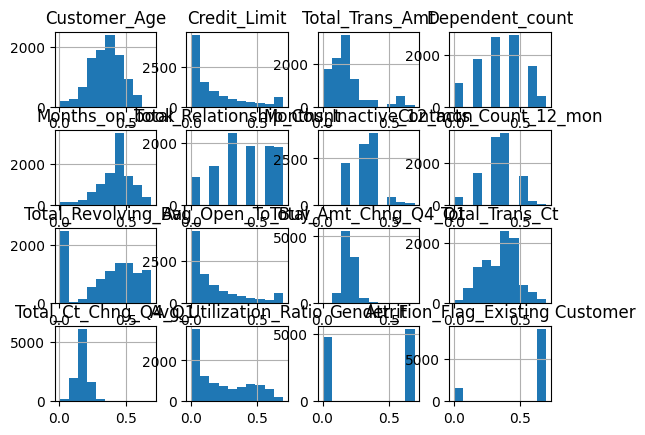

In [17]:
d4.hist()

In [18]:
y_label=d3["Attrition_Flag_Existing Customer"]
y_label

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10122    1.0
10123    0.0
10124    0.0
10125    0.0
10126    0.0
Name: Attrition_Flag_Existing Customer, Length: 10127, dtype: float64

In [19]:
d4.drop(columns=['Attrition_Flag_Existing Customer'])

,Customer_Age,Credit_Limit,Total_Trans_Amt,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F
0,0.339507,0.292811,0.034665,0.470004,0.472906,0.587787,0.154151,0.405465,0.269035,0.296481,0.331455,0.221592,0.362929,0.059269,0.000000
1,0.398348,0.187402,0.042534,0.693147,0.542865,0.693147,0.154151,0.287682,0.295104,0.193997,0.374068,0.164068,0.693147,0.099940,0.693147
2,0.426519,0.058127,0.073818,0.470004,0.428455,0.470004,0.154151,0.000000,0.000000,0.094354,0.567366,0.074662,0.487453,0.000000,0.000000
3,0.260726,0.055128,0.036115,0.587787,0.397683,0.336472,0.510826,0.154151,0.693147,0.022717,0.346140,0.074662,0.487453,0.565746,0.693147
4,0.260726,0.094483,0.016881,0.470004,0.170626,0.587787,0.154151,0.000000,0.000000,0.128004,0.494861,0.130620,0.514695,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.412532,0.074677,0.605761,0.336472,0.487295,0.336472,0.287682,0.405465,0.551238,0.060405,0.188094,0.604019,0.207623,0.380122,0.000000
10123,0.276987,0.082335,0.377901,0.336472,0.246133,0.470004,0.287682,0.405465,0.625133,0.058739,0.212430,0.376630,0.168813,0.413110,0.000000
10124,0.324240,0.113366,0.434490,0.182322,0.428455,0.587787,0.405465,0.510826,0.000000,0.145516,0.215994,0.327573,0.199054,0.000000,0.693147
10125,0.081678,0.109905,0.363732,0.336472,0.428455,0.470004,0.405465,0.405465,0.000000,0.142305,0.146256,0.338685,0.177644,0.000000,0.000000


In [20]:
x_train,x_test,y_train,y_test=train_test_split(d4,y_label,test_size=0.2,train_size=0.8)

In [21]:
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [22]:
y_pred=naive_bayes.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       333
         1.0       1.00      1.00      1.00      1693

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

